# Predicting the possibility of heart disease with an ML Model

This notebook utilizes various Python-based libraries and tools to build an machine learning model that aims to predict the occurrence of heart disease in a person based on several medical characteristics associated with them

#### Approach:
1. Problem definition
2. Data analysis
    1. Refine features
    2. Split the data as features and labels
    3. Imputation
    4. Delete missing target values
    5. Numerical encoding
    6. Feature scaling if required
3. Identifying evaluation metrics
4. Classifying features
5. Modelling
    1. Split the data into train, validation, and test sets
    2. Choose a model
    3. Fit it to the training data
    4. Check the performance of the model on test data
6. Experimentation
    1. Tune hyperparameters
    2. Evaluate the model
    3. Improve the model
    4. Improve the data
    
## Problem Definition

This is a binary classification problem, with one target to predict:
>Using the medical attributes of a patient, predict the possibility of that patient having heart disease or not. 

## Data Sources

The dataset used in this is from the Cleaveland data from the UCI Machine Learning Repository.
Dataset link: https://archive.ics.uci.edu/ml/datasets/heart+disease

Another version of the same is available on Kaggle.
Dataset link: https://www.kaggle.com/cherngs/heart-disease-cleveland-uci

## Evaluation Metrics

>The aimed accuracy of predicting if a person has heart disease or not is set at 95%.

## Features

Information about the features of the data

**Data Dictionary For The Project:**
* age: age in years
* sex: sex (1 = male; 0 = female)
* cp: chest pain type
    + Value 0: typical angina
    + Value 1: atypical angina
    + Value 2: non-anginal pain
    + Value 3: asymptomatic
* trestbps: resting blood pressure (in mm Hg on admission to the hospital)
* chol: serum cholestoral in mg/dl
* fbs: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
* restecg: resting electrocardiographic results
    + Value 0: normal
    + Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
    + Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
* thalach: maximum heart rate achieved
* exang: exercise induced angina (1 = yes; 0 = no)
* oldpeak = ST depression induced by exercise relative to rest
* slope: the slope of the peak exercise ST segment
    + Value 0: upsloping
    + Value 1: flat
    + Value 2: downsloping
* ca: number of major vessels (0-3) colored by flourosopy
* thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
* label condition: 0 = no disease, 1 = disease

Source: https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci

In [1]:
# Importing everything required

# Regular Exploratory Data Analysis and plotting libraries - import
# Regular EDA:
import pandas as pd
import numpy as np

# Plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Inline plots within notebook
%matplotlib inline

# Modelling - import
# Models:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC

# Model Evaluation:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

# Evaluation Metrics:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Data Imputation and Numerical Encoding:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

#Pipeline creation:
from sklearn.pipeline import Pipeline

#Exporting and importing model:
import pickle

## Loading data into environment

In [2]:
df=pd.read_csv("heart-disease.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [3]:
df.shape

(303, 14)

## Exploratory Data Analysis

### General Description

In [4]:
# Analyzing target variable distribution

df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

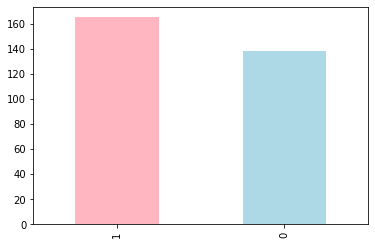

In [5]:
# Plotting target value distribution

df["target"].value_counts().plot(kind="bar",color=["lightpink","lightblue"]);

In [6]:
# General information about dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [7]:
# Checking for missing values

df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [8]:
# Numerical description about each feature

df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


### Pattern Analysis

**Heart disease frequency according to chest pain type:**

In [9]:
df["cp"].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [10]:
# Comparison between chest pain type and target values:

pd.crosstab(df["target"],df["cp"])

cp,0,1,2,3
target,,,,
0,104,9,18,7
1,39,41,69,16


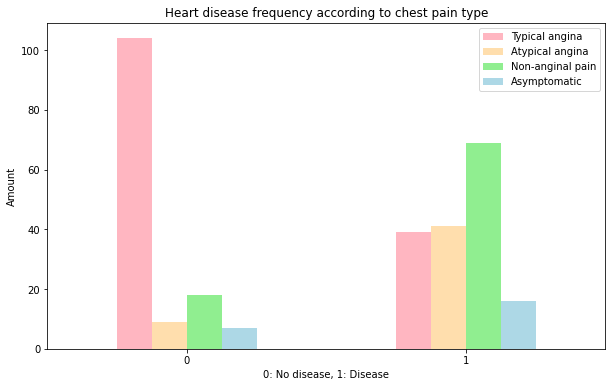

In [11]:
pd.crosstab(df["target"],df["cp"]).plot(kind="bar",
                                       figsize=(10,6),
                                       color=["lightpink","navajowhite","lightgreen","lightblue"])
plt.title("Heart disease frequency according to chest pain type")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Typical angina","Atypical angina","Non-anginal pain","Asymptomatic"])
plt.xticks(rotation=0);

**Heart disease frequency according to resting electrocardiographic results:**

In [12]:
df["restecg"].value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

In [13]:
# Comparison between resting electrocardiographic results and target values:

pd.crosstab(df["target"],df["restecg"])

restecg,0,1,2
target,,,
0,79,56,3
1,68,96,1


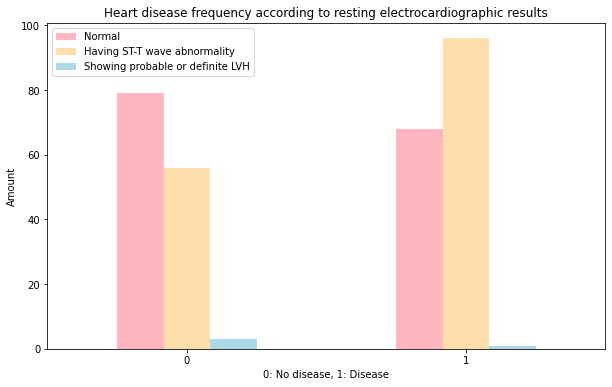

In [14]:
pd.crosstab(df["target"],df["restecg"]).plot(kind="bar",
                                            figsize=(10,6),
                                            color=["lightpink","navajowhite","lightblue"])
plt.title("Heart disease frequency according to resting electrocardiographic results")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Normal","Having ST-T wave abnormality","Showing probable or definite LVH"])
plt.xticks(rotation=0);

**Heart disease frequency according to sex:**

In [15]:
df["sex"].value_counts()

1    207
0     96
Name: sex, dtype: int64

In [16]:
# Comparison between sex and target values:

pd.crosstab(df["target"],df["sex"])

sex,0,1
target,,
0,24,114
1,72,93


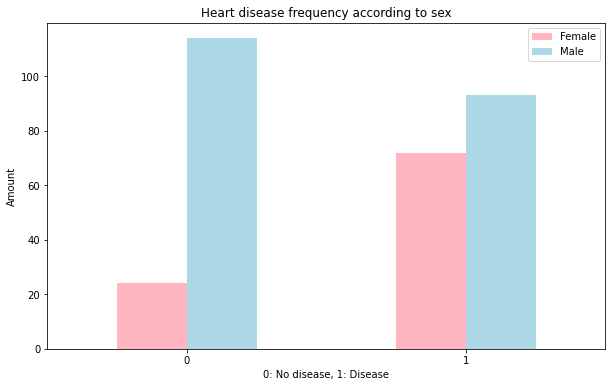

In [17]:
pd.crosstab(df["target"],df["sex"]).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["lightpink","lightblue"])
plt.title("Heart disease frequency according to sex")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0);

**Heart disease frequency according to fasting blood sugar levels**

In [18]:
df["fbs"].value_counts()

0    258
1     45
Name: fbs, dtype: int64

In [19]:
# Comparison between fasting blood sugar levels and target values:

pd.crosstab(df["target"],df["fbs"])

fbs,0,1
target,,
0,116,22
1,142,23


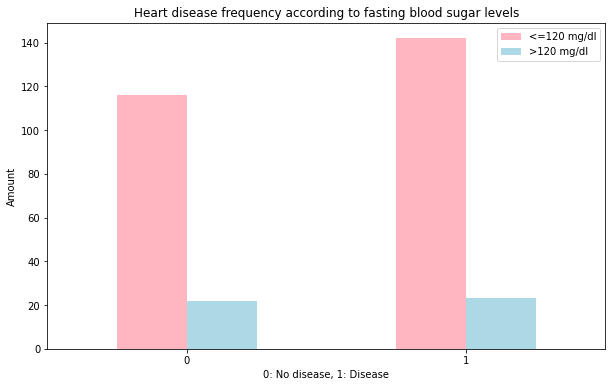

In [20]:
pd.crosstab(df["target"],df["fbs"]).plot(kind="bar",
                                        figsize=(10,6),
                                        color=["lightpink","lightblue"])
plt.title("Heart disease frequency according to fasting blood sugar levels")
plt.xlabel("0: No disease, 1: Disease")
plt.ylabel("Amount")
plt.legend(["<=120 mg/dl",">120 mg/dl"])
plt.xticks(rotation=0);

**Age vs. Maximum Heart Rate for Heart Disease**

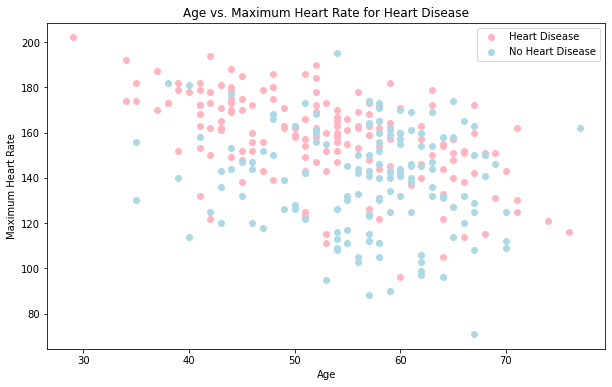

In [21]:
fig, ax=plt.subplots(figsize=[10,6])
heart_disease=ax.scatter(df["age"][df.target==1],df["thalach"][df.target==1],c=["lightpink"])
no_heart_disease=ax.scatter(df["age"][df.target==0],df["thalach"][df.target==0],c=["lightblue"])
ax.set(title="Age vs. Maximum Heart Rate for Heart Disease",
      xlabel="Age",
      ylabel="Maximum Heart Rate")
ax.legend((heart_disease,no_heart_disease),("Heart Disease","No Heart Disease"));

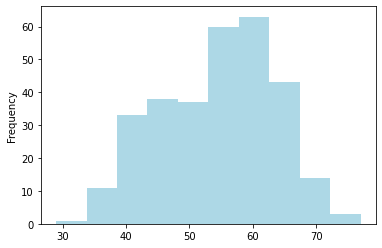

In [22]:
# Checking age distribution
df["age"].plot(kind="hist",color="lightblue");

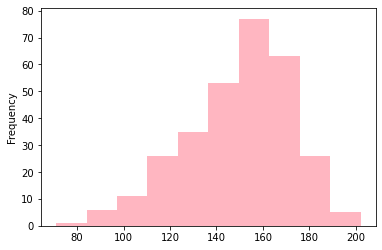

In [23]:
# Checking maximum heart rate distrubution
df["thalach"].plot(kind="hist",color="lightpink");

**Cholestrol vs. Resting Blood Pressure for Heart Disease**

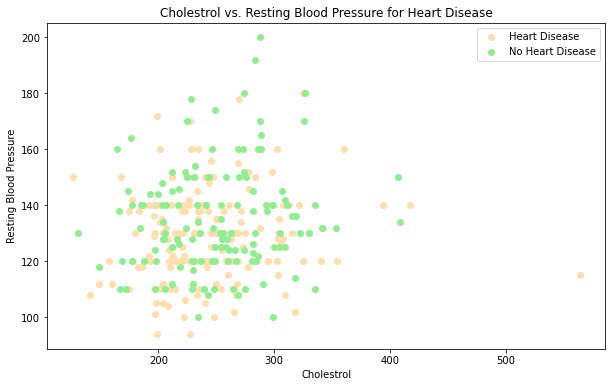

In [24]:
fig, ax=plt.subplots(figsize=[10,6])
heart_disease=ax.scatter(df["chol"][df.target==1],df["trestbps"][df.target==1],c=["navajowhite"])
no_heart_disease=ax.scatter(df["chol"][df.target==0],df["trestbps"][df.target==0],c=["lightgreen"])
ax.set(title="Cholestrol vs. Resting Blood Pressure for Heart Disease",
      xlabel="Cholestrol",
      ylabel="Resting Blood Pressure")
ax.legend((heart_disease,no_heart_disease),("Heart Disease","No Heart Disease"));

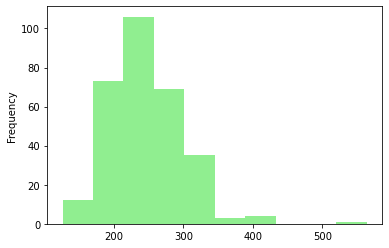

In [25]:
# Checking cholestrol distribution
df["chol"].plot(kind="hist",color="lightgreen");

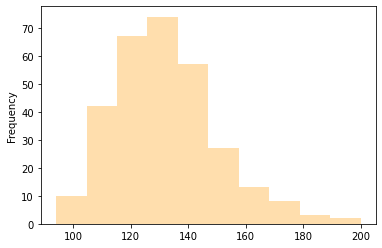

In [26]:
# Checking resting blood pressure distribution
df["trestbps"].plot(kind="hist",color="navajowhite");

**Correlation Matrix**

In [27]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


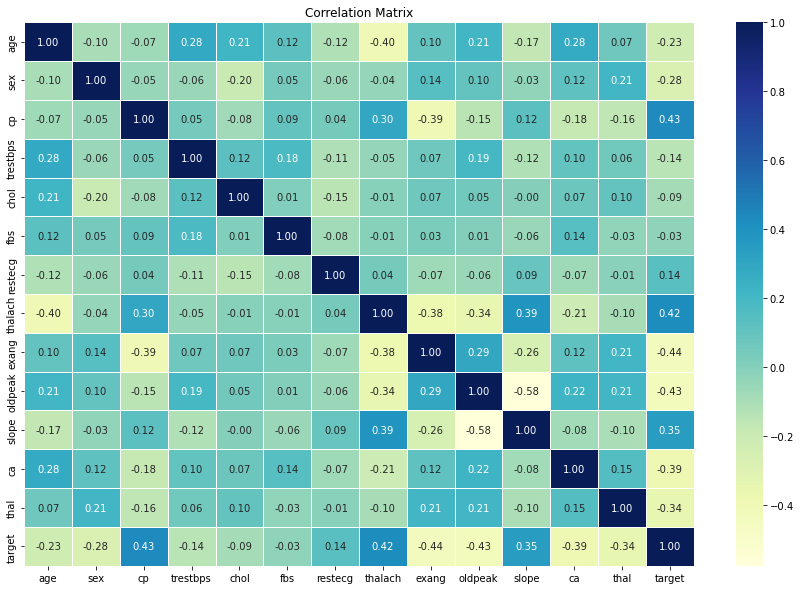

In [28]:
# Correlation matrix visualization

corr_matrix=df.corr()
fig,ax=plt.subplots(figsize=(15,10))
ax=sns.heatmap(corr_matrix,
              annot=True,
              linewidths=0.5,
              fmt=".2f",
              cmap="YlGnBu")
ax.set(title="Correlation Matrix");

## Modelling

### Features and labels data split

In [29]:
X=df.drop("target",axis=1)
y=df["target"]

In [30]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [31]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

### Train and test data split

In [32]:
# Setting up random seed
np.random.seed(42)

# Train and test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [33]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [34]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

### Selecting a model

**Potential Models:**
   1. Logistic Regression: Predicts the probability of an event based on a combo of independent variables
   2. K-Neighbors Classifier: Classifies data based on the levels of similarity
   3. Random Forest Classifier: Uses a set of decision trees to predict on an averaged accuracy level
   4. Linear Support Vector Classifier: Predicts on the basis of classes found in linearly separable data 

In [35]:
# Setting up model dictionary
models={"Logistic Regression": LogisticRegression(),
       "K-Neighbors Classifier": KNeighborsClassifier(),
       "Random Forest Classifier": RandomForestClassifier(),
       "Linear Support Vector Classifer": LinearSVC()}


def fit_score(models, X_train, X_test, y_train, y_test):
    # Docstring:
    # Fitting and scoring function
    '''
        Function purpose: To fit and evaluate a set of selected models on specified data splits
        Parameters list:
            1. models: A dictionary of models to fit and score
            2. X_train: Training data without labels - Training features
            3. X_test: Testing data without labels - Testing features
            4. y_train: Training target data with labels - Training labels
            5. y_test: Testing target data with labels - Testing labels
    '''
    # Setting up random seed:
    np.random.seed(42)
    # Dictionary store scores of each model:
    model_scores={}
    # Looping through models for fitting and scoring:
    for name,model in models.items():
        # Fitting model to training data:
        model.fit(X_train,y_train)
        # Evaulate model and store results in model_scores:
        model_scores[name]=model.score(X_test,y_test)
    return model_scores

In [36]:
model_scores=fit_score(models, X_train, X_test, y_train, y_test)

model_scores

C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Logistic Regression': 0.8852459016393442,
 'K-Neighbors Classifier': 0.6885245901639344,
 'Random Forest Classifier': 0.8360655737704918,
 'Linear Support Vector Classifer': 0.819672131147541}

**Model Comparison Visualization**

In [37]:
model_compare=pd.DataFrame(model_scores,index=["Accuracy"])
model_compare

,Logistic Regression,K-Neighbors Classifier,Random Forest Classifier,Linear Support Vector Classifer
Accuracy,0.885246,0.688525,0.836066,0.819672


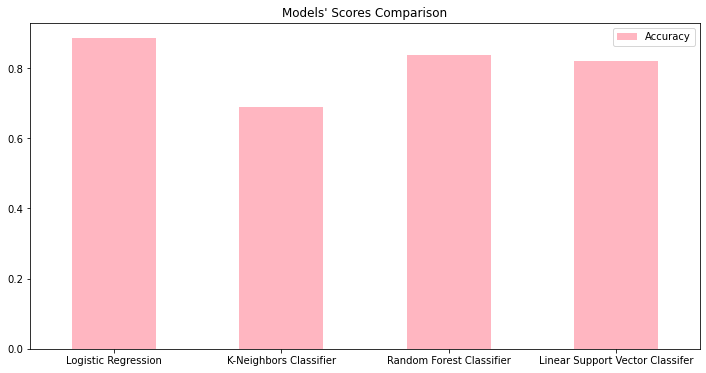

In [38]:
model_compare.T.plot(kind="bar",
                  figsize=(12,6),
                  color=["lightpink"])
plt.xticks(rotation=0)
plt.title("Models' Scores Comparison");

**Inferences after baseline modelling:**
+ Logistic Regression performs the best out of all models
+ The measurement of performance is on accuracy, for which LG produces a score of 88.52%
+ Selected baseline model: Logistic Regressor
+ Baseline accuracy score obtained for further improvement: 88.52%
+ Target accuracy score for successful prediction: >=95%

## Model Improvement

**Checklist to cover:**
+ Hyperparameter tuning
+ Feature importance
+ Confusion matrix
+ Extended classification evaluation metrics:
    - Precision score
    - Recall/Sensitivity score
    - F1 Score
    - Specificity score
    - Classification report
    - ROC Curve visualization
    - Area under the curve

## Hyperparameter Tuning

### Hyperparameters:

In [39]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
lsvc=LinearSVC()
clf=RandomForestClassifier()

In [40]:
pd.DataFrame(lg.get_params(),index=["Hyperparameters"]).swapaxes("index","columns")

,Hyperparameters
C,1.0
class_weight,None
dual,False
fit_intercept,True
intercept_scaling,1
l1_ratio,None
max_iter,100
multi_class,auto
n_jobs,None
penalty,l2


In [41]:
pd.DataFrame(knn.get_params(),index=["Hyperparameters"]).swapaxes("index","columns")

,Hyperparameters
algorithm,auto
leaf_size,30
metric,minkowski
metric_params,None
n_jobs,None
n_neighbors,5
p,2
weights,uniform


In [42]:
pd.DataFrame(lsvc.get_params(),index=["Hyperparameters"]).swapaxes("index","columns")

,Hyperparameters
C,1.0
class_weight,None
dual,True
fit_intercept,True
intercept_scaling,1
loss,squared_hinge
max_iter,1000
multi_class,ovr
penalty,l2
random_state,None


In [43]:
pd.DataFrame(clf.get_params(),index=["Hyperparameters"]).swapaxes("index","columns")

,Hyperparameters
bootstrap,True
ccp_alpha,0.0
class_weight,None
criterion,gini
max_depth,None
max_features,auto
max_leaf_nodes,None
max_samples,None
min_impurity_decrease,0.0
min_samples_leaf,1


### Hyperparameter tuning with RandomizedSearchCV

**Hyperparameter Grids**

In [44]:
# Hyperparameter grid for Logistic Regression
lg_grid={"C":np.logspace(-4,4,20),
        "solver":["liblinear"]}

# Hyperparameter grid for Random Forest Classifier
clf_grid={"n_estimators":np.arange(10,1000,50),
         "max_depth":[None,3,5,10],
         "min_samples_split":np.arange(2,20,2),
         "min_samples_leaf":np.arange(1,20,2)}

# Hyperparameter grid for Linear SVC
lsvc_grid={"C":np.logspace(-4,4,20)}

# Hyperparameter grid for K Neighbors Classifier
knn_grid={"n_neighbors":np.arange(1,21)}

**Tuning models with RandomizedSearchCV**

In [45]:
# Setup random seed
np.random.seed(42)

# Setup RSCV scores dictionary
rscv_model_scores={}

*Logistic Regression:*

In [46]:
# Setting up RSCV for Logistic Regression
rs_lg=RandomizedSearchCV(LogisticRegression(),
                        param_distributions=lg_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fitting this model to the training data
rs_lg.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_lg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rscv_model_scores["Logistic Regression"]=rs_lg.score(X_test,y_test)
rs_lg.score(X_test,y_test)

0.8852459016393442

*Random Forest Classifier*

In [49]:
# Setting up RSCV for Random Forest Classifier
rs_clf=RandomizedSearchCV(RandomForestClassifier(),
                        param_distributions=clf_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fitting this model to the training data
rs_clf.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [50]:
rs_clf.best_params_

{'n_estimators': 360,
 'min_samples_split': 4,
 'min_samples_leaf': 15,
 'max_depth': 5}

In [51]:
rscv_model_scores["Random Forest Classifier"]=rs_clf.score(X_test,y_test)
rs_clf.score(X_test,y_test)

0.8688524590163934

*K-Neighbors Classifier*

In [52]:
# Setting up RSCV for K-Neighbors Classifier
rs_knn=RandomizedSearchCV(KNeighborsClassifier(),
                        param_distributions=knn_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fitting this model to the training data
rs_knn.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(), n_iter=20,
                   param_distributions={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])},
                   verbose=True)

In [53]:
rs_knn.best_params_

{'n_neighbors': 3}

In [54]:
rscv_model_scores["K-Neighbors Classifier"]=rs_knn.score(X_test,y_test)
rs_knn.score(X_test,y_test)

0.6557377049180327

*Linear Support Vector Classification*

In [55]:
# Setting up RSCV for Random Forest Classifier
rs_lsvc=RandomizedSearchCV(LinearSVC(),
                        param_distributions=lsvc_grid,
                        cv=5,
                        n_iter=20,
                        verbose=True)

# Fitting this model to the training data
rs_lsvc.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the

C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the

C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the

RandomizedSearchCV(cv=5, estimator=LinearSVC(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04])},
                   verbose=True)

In [56]:
rs_lsvc.best_params_

{'C': 0.08858667904100823}

In [57]:
rscv_model_scores["Linear Support Vector Classifier"]=rs_lsvc.score(X_test,y_test)
rs_lsvc.score(X_test,y_test)

0.8360655737704918

**Model Comparison Visualization**

In [58]:
rscv_model_compare=pd.DataFrame(rscv_model_scores,index=["Accuracy"])
rscv_model_compare

,Logistic Regression,Random Forest Classifier,K-Neighbors Classifier,Linear Support Vector Classifier
Accuracy,0.885246,0.868852,0.655738,0.836066


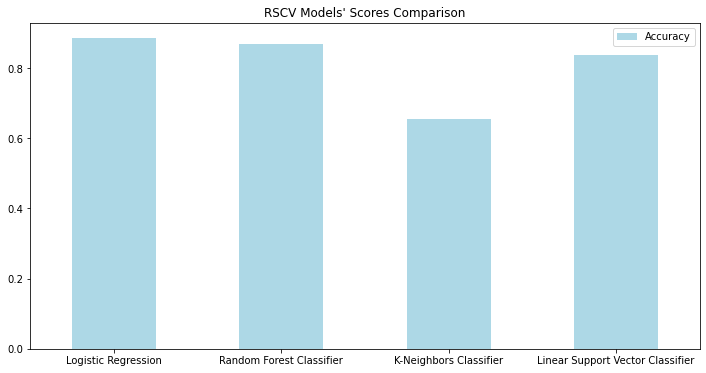

In [59]:
rscv_model_compare.T.plot(kind="bar",
                  figsize=(12,6),
                  color=["lightblue"])
plt.xticks(rotation=0)
plt.title("RSCV Models' Scores Comparison");

**Tuning models with GridSearchCV**

From the above hyperparameter tuning the Logistic Regression model had the best scores so we will use GridSearchCV to try to tune it further.

In [71]:
# Setup random seed
np.random.seed(42)

# Setup more specific hyperparameter grid
gs_lg_grid={"C":np.logspace(-4,4,30),
           "solver":["liblinear"]}

# Setting up GSCV for Logistic Regression
gs_lg=GridSearchCV(LogisticRegression(),
                        param_grid=gs_lg_grid,
                        cv=5,
                        verbose=True)

# Fitting this model to the training data
gs_lg.fit(X_train,y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [61]:
# Best hyperparameters after GSCV
gs_lg.best_params_

{'C': 0.19144819761699575, 'solver': 'liblinear'}

In [62]:
# Scoring the model with these best hyperparameters
gs_lg.score(X_test,y_test)

0.8852459016393442

## Tuned classifier evaluation beyond accuracy

**Factors/Metrics of evaluation:**
+ ROC curve and AUC score
+ Classification report
+ Recall/sensitivity score
+ Specificity score
+ F1 score
+ Confusion matrix

**Notes:**
+ Cross validation is to be utilized for better evaluation of each of these metrics
+ The evaluation will be done on the basis of predictions

In [63]:
# Predictions with tuned model on test data
y_preds=gs_lg.predict(X_test)
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

### ROC Curve and AUC Score

C:\Users\Admin\Desktop\ML-Bootcamp\heart-disease-project\env\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


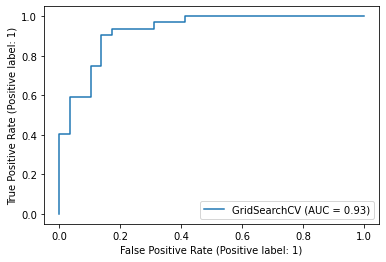

In [64]:
plot_roc_curve(gs_lg,X_test,y_test);

### Confusion Matrix

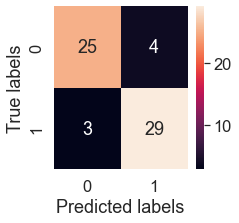

In [65]:
sns.set(font_scale=1.5)

def conf_matr(y_test,y_preds):
    '''
        Plots a confusion matrix as a heatmap
    '''
    fig,ax=plt.subplots(figsize=(3,3))
    ax=sns.heatmap(confusion_matrix(y_test,y_preds),
                  annot=True)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels");
    
conf_matr(y_test,y_preds)

### Classification Report for Single Split Data

In [67]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Evaluation Metrics Calculation with Cross Validation

In [92]:
# Instantiating a sample classifier based on the best model obtained
clf=LogisticRegression(C=0.23357214690901212,
                      solver="liblinear")
clf.fit(X_train,y_train);

In [93]:
# Cross-validated accuracy
cv_acc=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="accuracy")
cv_acc_score=np.mean(cv_acc)
cv_acc_score

0.8479781420765027

In [94]:
# Cross-validated precision
cv_prec=cross_val_score(clf,
                       X,
                       y,
                       cv=5,
                       scoring="precision")
cv_prec_score=np.mean(cv_prec)
cv_prec_score

0.8215873015873015

In [95]:
# Cross-validated recall
cv_rec=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="recall")
cv_rec_score=np.mean(cv_rec)
cv_rec_score

0.9272727272727274

In [96]:
# Cross-validated f1-score
cv_f1=cross_val_score(clf,
                      X,
                      y,
                      cv=5,
                      scoring="f1")
cv_f1_score=np.mean(cv_f1)
cv_f1_score

0.8705403543192143

In [97]:
# Visualizing cross-validated metrics
cv_metrics=pd.DataFrame({"Accuracy":cv_acc_score,
                        "Precision":cv_prec_score,
                        "Recall":cv_rec_score,
                        "F1 Score":cv_f1_score},
                       index=["Scores"])
cv_metrics

,Accuracy,Precision,Recall,F1 Score
Scores,0.847978,0.821587,0.927273,0.87054


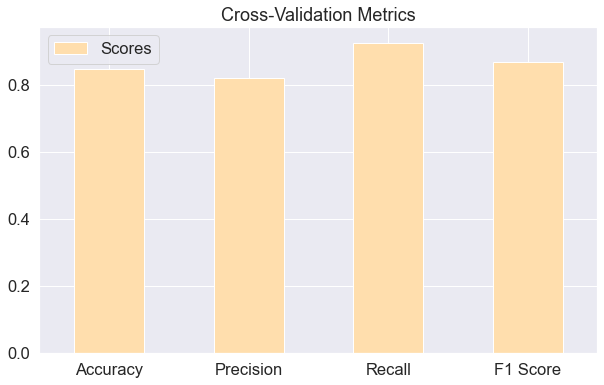

In [104]:
cv_metrics.T.plot(kind="bar",
               figsize=(10,6),
               color=["navajowhite"])
plt.title("Cross-Validation Metrics")
plt.xticks(rotation=0);

## Model Driven Exploratory Data Analysis

### Feature Importance

Here we will determine which features impact the results produced by the model the most.

In [99]:
# Instantiating a sample classifier based on the best model obtained
clf=LogisticRegression(C=0.23357214690901212,
                      solver="liblinear")
clf.fit(X_train,y_train);

In [100]:
# Check coef_
clf.coef_

array([[ 0.00369922, -0.90424087,  0.67472828, -0.0116134 , -0.00170364,
         0.04787689,  0.33490186,  0.02472938, -0.63120403, -0.57590919,
         0.4709512 , -0.6516535 , -0.69984202]])

In [101]:
# Creating a coef_ and feature dictionary
feature_dict=dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.003699219011760782,
 'sex': -0.9042408714480176,
 'cp': 0.6747282766540338,
 'trestbps': -0.01161340334265323,
 'chol': -0.0017036446360052262,
 'fbs': 0.04787688669240361,
 'restecg': 0.3349018562558094,
 'thalach': 0.024729384743360134,
 'exang': -0.631204028843173,
 'oldpeak': -0.575909185434028,
 'slope': 0.47095119664446533,
 'ca': -0.6516535002884537,
 'thal': -0.6998420233395882}

In [103]:
# Visualizing feature importance
feature_dict_df=pd.DataFrame(feature_dict, index=["Features"])
feature_dict_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
Features,0.003699,-0.904241,0.674728,-0.011613,-0.001704,0.047877,0.334902,0.024729,-0.631204,-0.575909,0.470951,-0.651654,-0.699842


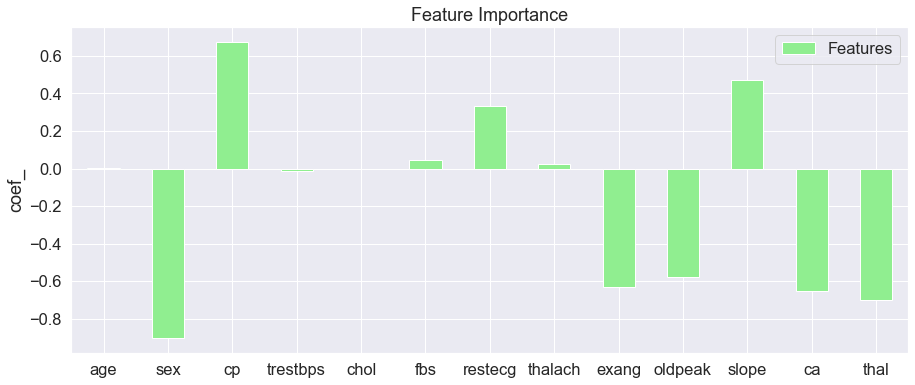

In [113]:
feature_dict_df.T.plot(kind="bar",
                    figsize=(15,6),
                    color=["lightgreen"])
plt.title("Feature Importance")
plt.xticks(rotation=0)
plt.ylabel("coef_");